# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [958]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

Now we read in the dataset and show the first 5 rows to familiarise ourselves with the data. Then we use .shape() to show the number of rows and columns in the csv file.

In [959]:
# Read in the data set
data = pd.read_csv('ames.csv')

# Show the first 5 rows of data
data.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [960]:
# Return the number of rows and columns of the DataFrame
data.shape

(2930, 14)

There are 2930 rows and 14 columns of data.

In pre-processing, we want to isolate the data we plan on working with, namely, the Gr_Liv_Area, Garage_Area and Sale_Price columns.

In [961]:
# Clean and pre-process the data if neccessary
# drop all other columns except 'Gr_liv_area', 'Garage_area' and 'Sale_Price' from dataframe
columns_to_keep = ['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']

cols_to_drop = [col for col in data.columns if col not in columns_to_keep]
data_iso = data.drop(columns=cols_to_drop)
print("\nDataFrame Info:")
print(data_iso.info())
print("First 5 rows of the dataset:")
data_iso.head()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr_Liv_Area  2930 non-null   int64
 1   Garage_Area  2930 non-null   int64
 2   Sale_Price   2930 non-null   int64
dtypes: int64(3)
memory usage: 68.8 KB
None
First 5 rows of the dataset:


,Gr_Liv_Area,Garage_Area,Sale_Price
0,1656,528,215000
1,896,730,105000
2,1329,312,172000
3,2110,522,244000
4,1629,482,189900


Here we can see the new dataframe, after all the other columns have been droppped, making it easier for us to reference this data, as this is all that we are looking at now.

In [962]:
# Check for any NaN values in the dataset
missing_values_count = data_iso.isnull().sum()

missing_values_count[0:3]

Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64

Here we are checking for unique values in both the Gr_Liv_Area and Garage_Area columns.

In [963]:
# Assess the number of unique values in the dataset
ground = data_iso['Gr_Liv_Area'].unique()
garage = data_iso['Garage_Area'].unique()
print(f"There are {len(ground)} unique Gr_Liv_Area values\n")
print(f"There are {len(garage)} unique Garage_Area values")

There are 1292 unique Gr_Liv_Area values

There are 603 unique Garage_Area values


From the above two sets of code, we can see that there are no NaN values in the dataset. There are also a high number of unique values in the columns for Gr_Liv_Area and Garage_Area. Minimising these and limiting the number of unique values would be detrimental to the assessment and bias our findings, as well, same sized Living Areas and Garage Areas could have different Sales Prices, affecting our findings and therefore should remain.

Now we standardise the dataset and insert the scaled data into the dataset so we can use it later.

In [964]:
# Standardise the data
# Set the StandardScaler object
temp_scaler = StandardScaler()
X_scaled = temp_scaler.fit_transform(data_iso[['Gr_Liv_Area', 'Garage_Area']])

# Add the scaled values back to the dataset
data_iso[['Gr_Liv_Area_Scaled', 'Garage_Area_Scaled']] = X_scaled

data_iso.head()

,Gr_Liv_Area,Garage_Area,Sale_Price,Gr_Liv_Area_Scaled,Garage_Area_Scaled
0,1656,528,215000,0.309265,0.257223
1,896,730,105000,-1.194427,1.196101
2,1329,312,172000,-0.337718,-0.746726
3,2110,522,244000,1.207523,0.229335
4,1629,482,189900,0.255844,0.043419


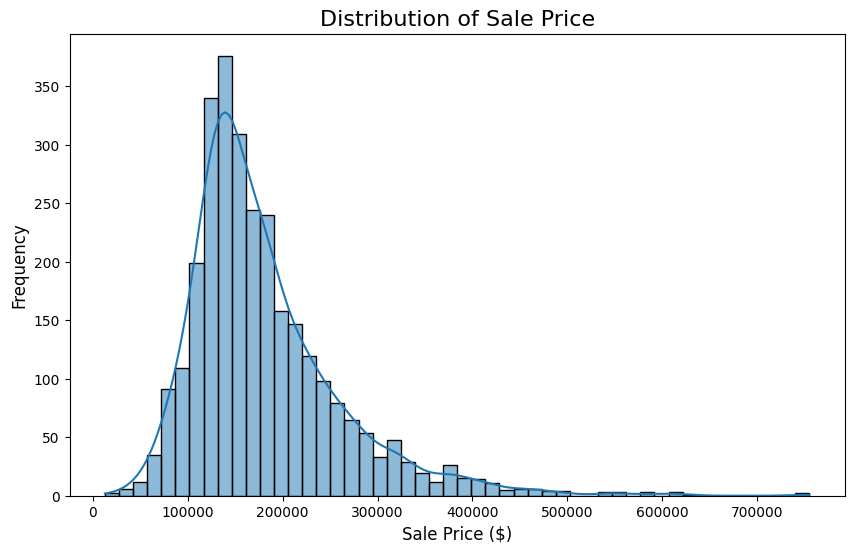

In [965]:
plt.figure(figsize=(10, 6))
sns.histplot(data_iso['Sale_Price'], kde=True, bins=50)
plt.title('Distribution of Sale Price', fontsize=16)
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


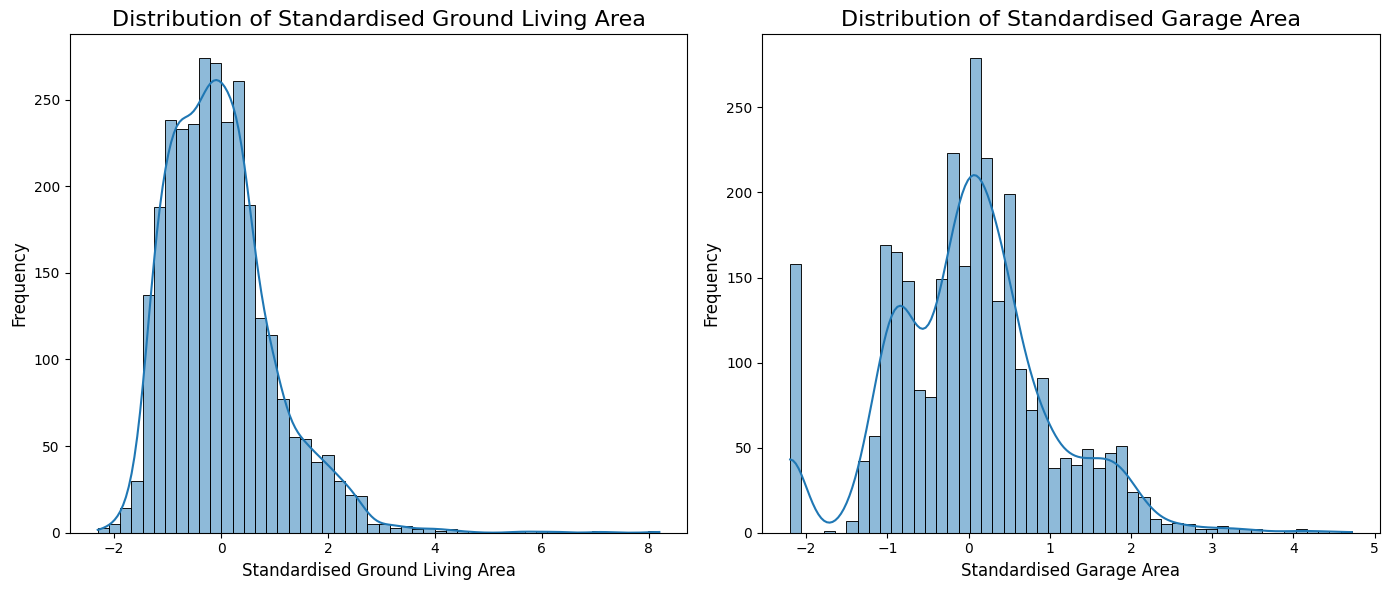

In [966]:
# Explore the data with visualisations such as histograms and correlation matrices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_iso['Gr_Liv_Area_Scaled'], kde=True, bins=50)
plt.title('Distribution of Standardised Ground Living Area', fontsize=16)
plt.xlabel('Standardised Ground Living Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(data_iso['Garage_Area_Scaled'], kde=True, bins=50)
plt.title('Distribution of Standardised Garage Area', fontsize=16)
plt.xlabel('Standardised Garage Area', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()
plt.close()

The above graphs show a linear relationship between Sale_Price and Gr_Liv_Area & Garage_Area. Generally, as the area of ground living area (and garage area) increases, so does the sale price of the property, which is in line with what we expect.

Now we split the dependent and independent variables into our x and y components so that we can begin plotting them on graphs and later, apply our linear regression model.

In [967]:
# Split the independent variables from the dependent variable
X = data_iso[['Gr_Liv_Area_Scaled', 'Garage_Area_Scaled']]
y = data_iso['Sale_Price']


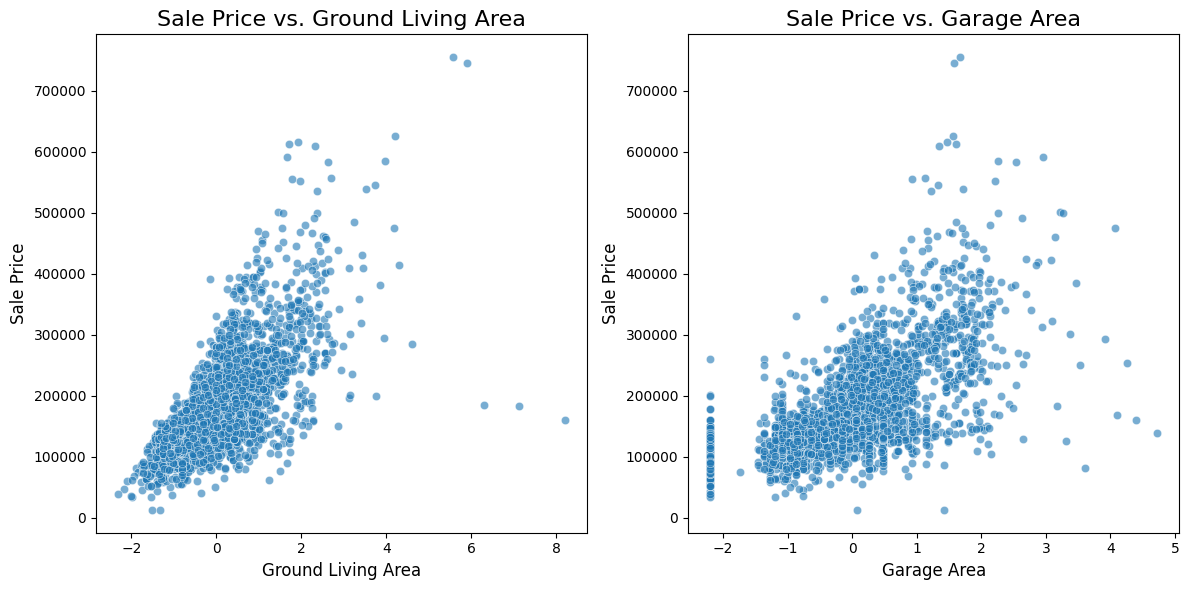

In [968]:
# Explore relationships between the independent and dependent variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Gr_Liv_Area_Scaled', y='Sale_Price', data=data_iso, alpha=0.6)
plt.title('Sale Price vs. Ground Living Area', fontsize=16)
plt.xlabel('Ground Living Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)

plt.subplot(1, 2, 2)
sns.scatterplot(x='Garage_Area_Scaled', y='Sale_Price', data=data_iso, alpha=0.6)
plt.title('Sale Price vs. Garage Area', fontsize=16)
plt.xlabel('Garage Area', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)

plt.tight_layout()
plt.show()

As shown before, there is a linear relationship between our dependent and independent variables, with a few outliers in the Garage_Area graph showing a high frequency of Garage_Area's more than 2 standard deviations in a negative path having a larger effect on sales price than many properties at -1 and even 0 standard deviations.

Next we create a training set and a test set with which to use for our linear regression model, with a 75:25 split.

In [969]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")

Training data: 2197 samples
Testing data: 733 samples


Now we make our multiple linear regression model using our training variables.

In [970]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now we assess our multiple linear regression model by checking the intercept and coefficients. 

In [971]:
# Print the model intercept and coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Ground Living Area: {model.coef_[0]}")
print(f"Coefficient for Garage Area: {model.coef_[1]}")

Intercept: 179669.19830838894
Coefficient for Ground Living Area: 39773.155432193416
Coefficient for Garage Area: 30367.567653115828


The intercept shows what our Y value will be should our dependent variables equal to zero (0). The coefficients show what affect they will have on the Y value. The coefficient for Ground living area is higher than that of the Garage area, showing that for one standard deviation increase in both garage area and ground living area, the sale price would increase more for the ground living area.

Now we generate a prediction set for our linear regresion based on our model. 

In [972]:
# Generate predictions for the test set
y_pred = model.predict(X_test)

Here we tes the R2 score to measure the goodness of fit of our model to the dependent variable (Sale_Price)

In [973]:
# Evaluate the model
r2_test = round (r2_score(y_test, y_pred), 4)
print(f"The root mean test score is: {r2_test}")

The root mean test score is: 0.6386


The R2 score is 0.6386 - a slightly high score. This means that our model will be decent at explaining the variability in our data.

Now we plot our multiple linear regression model with our actual data to visualise what we have created and to assess how well it actually predicts the outcomes.

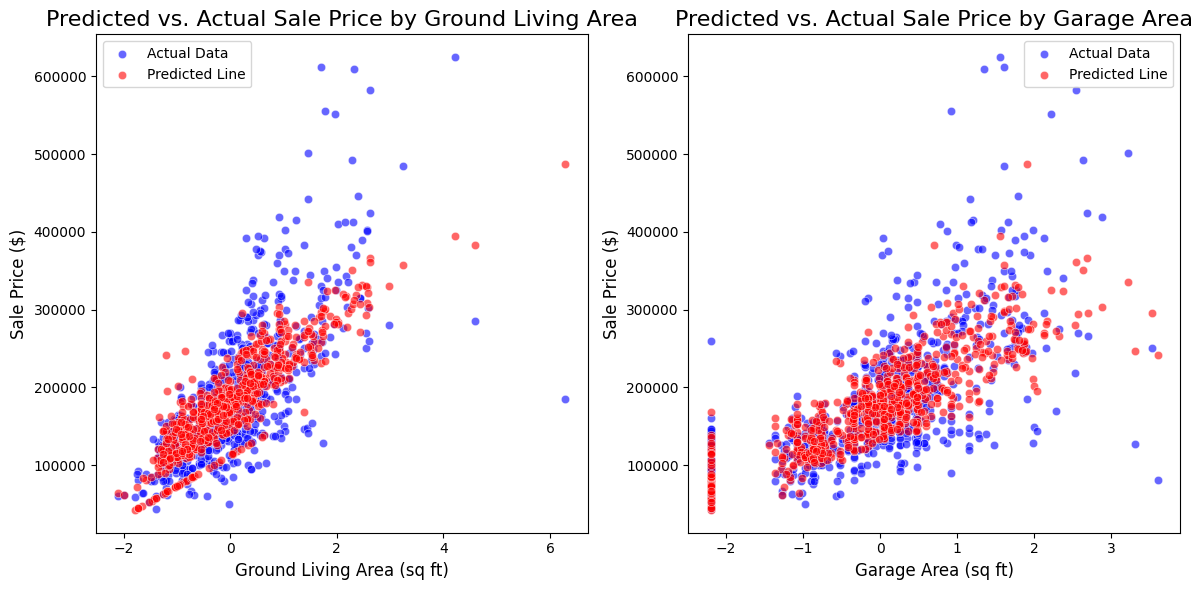

In [974]:
# Generate a plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
# Plot actual test data points
sns.scatterplot(x=X_test['Gr_Liv_Area_Scaled'], y=y_test, color='blue', label='Actual Data', alpha=0.6)
# Plot predicted values for the same independent variable
sns.scatterplot(x=X_test['Gr_Liv_Area_Scaled'], y=y_pred, color='red', label='Predicted Line', alpha=0.6)
plt.title('Predicted vs. Actual Sale Price by Ground Living Area', fontsize=16)
plt.xlabel('Ground Living Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
# Plot actual test data points
sns.scatterplot(x=X_test['Garage_Area_Scaled'], y=y_test, color='blue', label='Actual Data', alpha=0.6)
# Plot predicted values for the same independent variable
sns.scatterplot(x=X_test['Garage_Area_Scaled'], y=y_pred, color='red', label='Predicted Line', alpha=0.6)
plt.title('Predicted vs. Actual Sale Price by Garage Area', fontsize=16)
plt.xlabel('Garage Area (sq ft)', fontsize=12)
plt.ylabel('Sale Price ($)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

As suspected, our model fits relatively well, and does a good job at predicting the sale price compared to the Ground living area and garage areas.

In [975]:
# Print the coefficients
print(f"Coefficient for Gr_Liv_Area: {model.coef_[0]}")
print(f"Coefficient for Garage_Area: {model.coef_[1]}")

Coefficient for Gr_Liv_Area: 39773.155432193416
Coefficient for Garage_Area: 30367.567653115828


**Interpret coefficients in the context of the prediction:**
There is a greater coefficient for the Gr_Liv_Area vs the Garage_area. This predicts that for each increase in standard deviation for Garage size, we should expect to see a third more increase in Sale_Price than we would have for the same increase in standard deviation for the Garage_Area.

**Summarise findings**
  The Sales_Price is skewed to the right, which is common for housing market prices. Looking at the scatter plots, there seems to be a linear relationship between increasing Living Area size & Garage area size and the cost of the property.
  The model scored 0.6386 on the R2 test score - this is a fairly high correlation between test and actual data. This model should predict the target value for our independent variables quite well.
  The coefficients show that the ground living area has a larger impact of the sale price of a property vs the garage area (per standard deviation).
  The new plots show the models' predicted values (red dots) compared to the actual data points (blue dots) foor different house and garage sizes.
